# PCA & LDA

In this notebook, we will explore **Principal Component Analysis (PCA)** and **Linear Discriminant Analysis (LDA)**, fundamental techniques for dimensionality reduction.

# PCA


By transforming the original dataset into a new coordinate system, PCA helps us find directions (called *principal components*) along which the data varies the most. This allows us to project the data into a lower-dimensional space with minimal loss of information.

## What is PCA?

PCA is a mathematical procedure that:
- Identifies new axes (principal components) along which data variability is maximized.
- Ensures these components are **orthogonal** (uncorrelated).
- Orders the components such that the first one explains the most variance, the second explains the second most, and so on.

PCA can be seen as a form of **linear transformation** applied to the data that preserves structure while reducing dimensionality.

## Why Use PCA?

High-dimensional datasets often contain:
- **Redundant features** (e.g., correlated columns)
- **Noisy data**
- **Uninterpretable features** (e.g., pixels or sensors)

PCA helps us:
- **Visualize** data in 2D or 3D
- **Compress** data while retaining essential patterns
- **Speed up** computations by reducing input size
- **Remove multicollinearity** in linear models

### Real-world examples:
- **Image Compression**: Reducing pixel data while keeping visual quality.
- **Genomics**: Reducing thousands of gene expressions into core components.
- **Finance**: Extracting main factors driving asset prices.

We’ll start by preparing our environment and dataset in the next section.

## Data Preparation

Before performing PCA, we need a dataset and some basic preprocessing. In this section:

- We will load commonly used libraries.
- We'll choose a dataset suitable for PCA visualization and dimensionality reduction.
- We'll preprocess the data (centering and standardization) since PCA is sensitive to feature scaling.

### Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

### Dataset Selection

We will use the **Iris dataset** — a classical dataset with 4 numeric features and 3 target classes. This is a perfect choice for visualizing PCA in 2D and 3D.

Let’s load the dataset and view the first few entries.

In [2]:
# Load Iris dataset from sklearn
iris = load_iris()
X = iris.data  # features
y = iris.target  # target labels
feature_names = iris.feature_names
target_names = iris.target_names

# Convert to pandas DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df['target_name'] = df['target'].apply(lambda i: target_names[i])

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


### Data Preprocessing

PCA benefits from **standardization** when features are on different scales.

We'll apply `StandardScaler` to standardize all feature columns to have standard deviation = 1.

In [3]:
# Standardize the feature columns
X_scaled = StandardScaler().fit_transform(X)

# Wrap it back in a DataFrame for visualization (optional)
df_scaled = pd.DataFrame(X_scaled, columns=feature_names)
df_scaled['target'] = y
df_scaled['target_name'] = df['target_name']

df_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,-0.900681,1.019004,-1.340227,-1.315444,0,setosa
1,-1.143017,-0.131979,-1.340227,-1.315444,0,setosa
2,-1.385353,0.328414,-1.397064,-1.315444,0,setosa
3,-1.506521,0.098217,-1.283389,-1.315444,0,setosa
4,-1.021849,1.249201,-1.340227,-1.315444,0,setosa


## Mathematical Background of PCA

In this section, we will explore the theory behind PCA and walk through its key mathematical steps:

1. Compute the **Covariance Matrix**
2. Find its **Eigenvalues and Eigenvectors**
3. Use these to define the **Principal Components**

### Covariance Matrix

The **covariance matrix** captures how each pair of features varies together:

$$
\Sigma = \frac{1}{n} X^\top X
$$

Where:
- $ X $ is the **centered data matrix** (after standardization).
- $ \Sigma_{ij} $ is the covariance between features $ i $ and $ j $.

A high absolute value in $ \Sigma_{ij} $ means strong correlation (positive or negative).

### Eigenvalues and Eigenvectors

PCA finds the **eigenvectors** and **eigenvalues** of the covariance matrix.

- Eigenvectors determine the **directions** (principal axes).
- Eigenvalues determine the **amount of variance** in each direction.

$$
\Sigma \mathbf{v}_i = \lambda_i \mathbf{v}_i
$$

We sort the eigenvectors by descending eigenvalues to get the principal components.

### Principal Component Selection

Each **eigenvalue** represents the variance explained by its **corresponding eigenvector**.

To choose how many principal components to keep, we compute the **explained variance ratio**:

$$
\text{Explained Variance Ratio}_i = \frac{\lambda_i}{\sum_j \lambda_j}
$$


## PCA Implementation

In this section, we implement PCA **from scratch**, using the mathematical foundations we've built so far.

We'll walk through the following steps:

1. **Center the data**
2. **Compute the covariance matrix**
3. **Perform eigen-decomposition**
4. **Select top $k$ components**
5. **Project the data**
6. **(Optional) Reconstruct the data**

### Step 1: Center the Data

Though we’ve already standardized the data, for completeness, we will manually center it (mean = 0). This step ensures that PCA captures directions of maximum variance relative to the mean.

In [4]:
# Recompute X_centered just to demonstrate this step explicitly
X_centered = X_scaled - np.mean(X_scaled, axis=0)

We won't use X_centered from here because we're using standardized data (X_scaled)

### Step 2: Compute Covariance Matrix

We already computed this in Section 3, but let's re-use the standardized data:

$$
\Sigma = \frac{1}{n-1} X^\top X
$$

In [5]:
# Compute covariance matrix of the standardized data
cov_matrix = np.cov(X_scaled.T)

print("Covariance matrix shape:", cov_matrix.shape)
cov_matrix

Covariance matrix shape: (4, 4)


array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

### Step 3: Eigen Decomposition

We reuse the sorted eigenvalues and eigenvectors from before:

In [6]:
# Perform eigen-decomposition of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort the eigenvalues (and corresponding eigenvectors) in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

print("Sorted Eigenvalues:")
print(eigenvalues)

Sorted Eigenvalues:
[2.93808505 0.9201649  0.14774182 0.02085386]


### Explained Variance Ratio

One way to choose how many principal components to keep, we can compute the **explained variance ratio**, as explained in the previous section.

In [7]:
# Compute explained variance ratio
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

# Display explained variance per component
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Principal Component {i+1}: {ratio:.4f} variance explained")

Principal Component 1: 0.7296 variance explained
Principal Component 2: 0.2285 variance explained
Principal Component 3: 0.0367 variance explained
Principal Component 4: 0.0052 variance explained


Here, however, because we want to project the data into a 2D plane, we will choose a fixed number of principal components using top k sampling with k=2.

### Step 4: Select Top k Principal Components

In [8]:
k = 2  # Number of principal components to keep
top_k_eigenvectors = eigenvectors[:, :k]

print("Shape of top-k eigenvectors:", top_k_eigenvectors.shape)

Shape of top-k eigenvectors: (4, 2)


### Step 5: Project Data onto Principal Components

The projection is done as:

$$
Z = X \cdot V_k
$$

where $ V_k $ contains the top $ k $ eigenvectors.

In [9]:
# Project the data
X_pca = X_scaled.dot(top_k_eigenvectors)

print("Shape of projected data:", X_pca.shape)

Shape of projected data: (150, 2)


### Step 6: Reconstruct the Data

To see what information is lost, we can reconstruct the original standardized data:

$$
\hat{X} = Z \cdot V_k^T
$$

Compare the reconstructed dataframe with the original one to show the error.

In [10]:
# Reconstruct the data from the reduced representation
X_reconstructed = X_pca.dot(top_k_eigenvectors.T)

df_reconstructed = pd.DataFrame(X_reconstructed, columns=feature_names)
df_reconstructed['target'] = y
df_reconstructed['target_name'] = df['target_name']

df_reconstructed.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,-0.998889,1.053198,-1.302707,-1.247098,0,setosa
1,-1.338748,-0.061923,-1.224328,-1.220572,0,setosa
2,-1.360961,0.321117,-1.380603,-1.358338,0,setosa
3,-1.423598,0.067762,-1.349224,-1.338813,0,setosa
4,-1.001138,1.240918,-1.371254,-1.306618,0,setosa


## PCA Visualization

After computing the principal components and projecting the data, it's important to:

- Understand how many components are enough.
- Visualize the explained variance.
- See the structure of the data in reduced dimensions.

### Explained Variance Plot (Scree Plot)

A **scree plot** shows how much variance is explained by each principal component.

This helps us decide how many components to keep — for example, if 2 or 3 components capture >95% of the variance, we can safely reduce dimensionality.

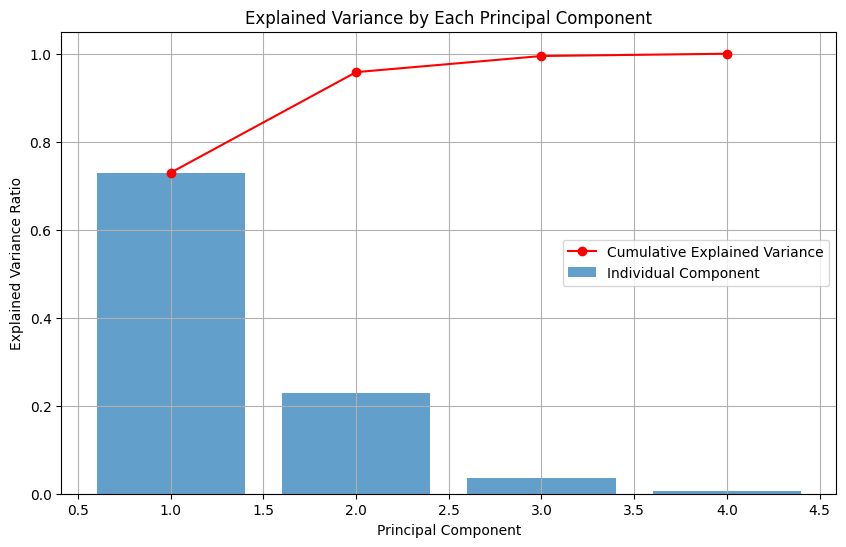

In [22]:
# Plot explained variance per component
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center', label='Individual Component')
plt.plot(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), marker='o', linestyle='-', color='red', label='Cumulative Explained Variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component')
plt.title('Explained Variance by Each Principal Component')
plt.legend(loc='best')
plt.grid(True)
plt.show()

### 2D Scatter Plot of PCA Projection

Let’s visualize the data projected into 2 dimensions using the first two principal components. This plot often reveals cluster structures or separations in the data.

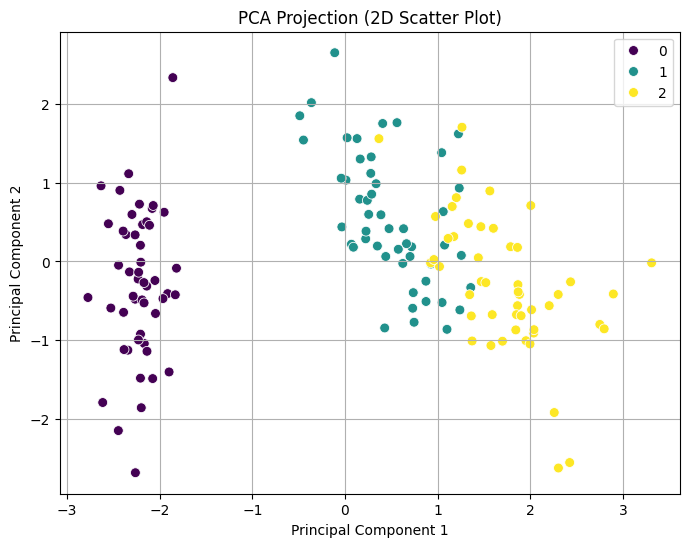

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis', legend='full', s=50)
plt.title('PCA Projection (2D Scatter Plot)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

These visualizations show:
- The amount of variance captured by each component.
- How well the first two components separate different classes in the dataset.

In the next section, we'll use `scikit-learn`'s built-in PCA to compare results and make our workflow easier.

## PCA Using Scikit-learn

In this section, we use `sklearn.decomposition.PCA` to:

- Easily compute principal components
- Access explained variance metrics
- Transform and visualize the data

Scikit-learn handles centering, SVD, and projection internally.

### Applying `PCA` from Scikit-learn

We'll reduce the Iris dataset to **2 components** and compare results with our manual projection.

In [13]:
from sklearn.decomposition import PCA

# Instantiate PCA with 2 components
pca_sklearn = PCA(n_components=2)

# Fit PCA to standardized data and transform
X_pca_sklearn = pca_sklearn.fit_transform(X_scaled)

# Shape check
print("Projected shape:", X_pca_sklearn.shape)

Projected shape: (150, 2)


### Interpretation and Component Analysis

Let's inspect the main outputs of the PCA object.

In [14]:
# PCA components (eigenvectors)
print("PCA components (principal axes):\n", pca_sklearn.components_)

# Explained variance per component
print("\nExplained variance (eigenvalues):", pca_sklearn.explained_variance_)

# Explained variance ratio
print("\nExplained variance ratio:", pca_sklearn.explained_variance_ratio_)

PCA components (principal axes):
 [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]

Explained variance (eigenvalues): [2.93808505 0.9201649 ]

Explained variance ratio: [0.72962445 0.22850762]


### 2D Visualization

Let’s plot the scikit-learn PCA projection using the same 2D scatter plot format.

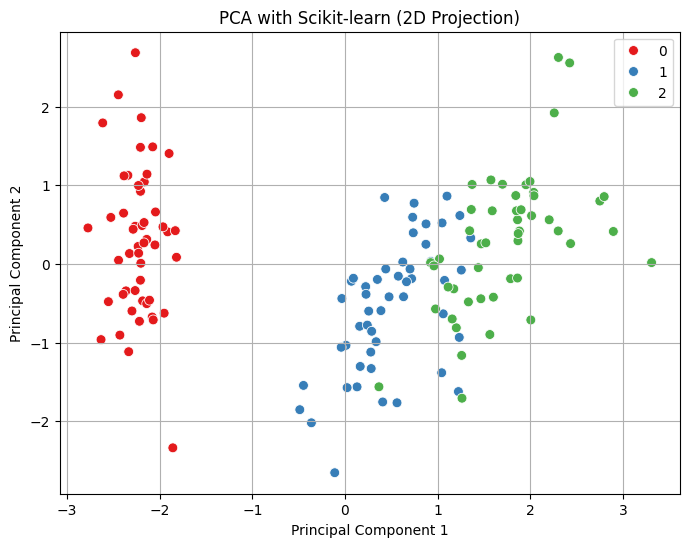

In [16]:
plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(x=X_pca_sklearn[:, 0], y=X_pca_sklearn[:, 1], hue=y, palette='Set1', legend='full', s=50)
plt.title('PCA with Scikit-learn (2D Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)

# Add legend labels
# handles, labels = scatter.get_legend_handles_labels()
# scatter.legend(handles=handles, labels=target_names)

plt.show()

### 3D Visualization

Sometimes, reducing to 2 dimensions is not enough. Let’s visualize the first **3 principal components** in 3D to better understand the structure.

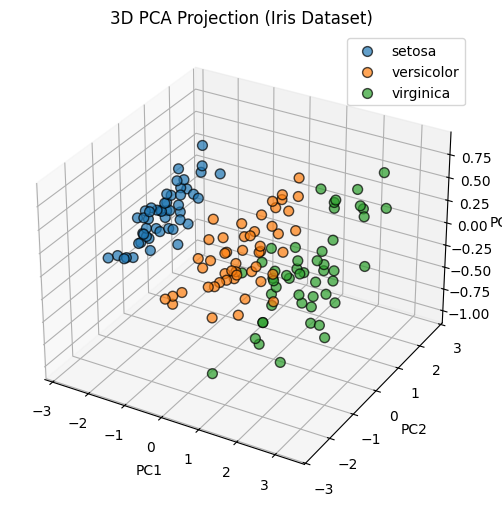

In [17]:
from mpl_toolkits.mplot3d import Axes3D

# Apply PCA with 3 components for 3D visualization
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

for name, label in zip(target_names, [0, 1, 2]):
    ax.scatter(X_pca_3d[y == label, 0],
               X_pca_3d[y == label, 1],
               X_pca_3d[y == label, 2],
               label=name, alpha=0.7, s=50, edgecolor='k')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D PCA Projection (Iris Dataset)')
ax.legend()
plt.show()

## PCA Loadings (Feature Importance)

The **loadings** are the coefficients of original features in each principal component.
They help explain which features contribute most to each component.

In [21]:
# Get loadings (eigenvectors multiplied by the square root of eigenvalues)
loadings = pca_sklearn.components_.T * np.sqrt(pca_sklearn.explained_variance_)

loading_df = pd.DataFrame(loadings, index=feature_names, columns=['PC1', 'PC2'])
display(loading_df)

,PC1,PC2
sepal length (cm),0.893151,0.362039
sepal width (cm),-0.461684,0.885673
petal length (cm),0.994877,0.023494
petal width (cm),0.968212,0.064214


### Plotting Feature Contributions to PC1 and PC2

This shows how each original feature contributes to the first two principal components.


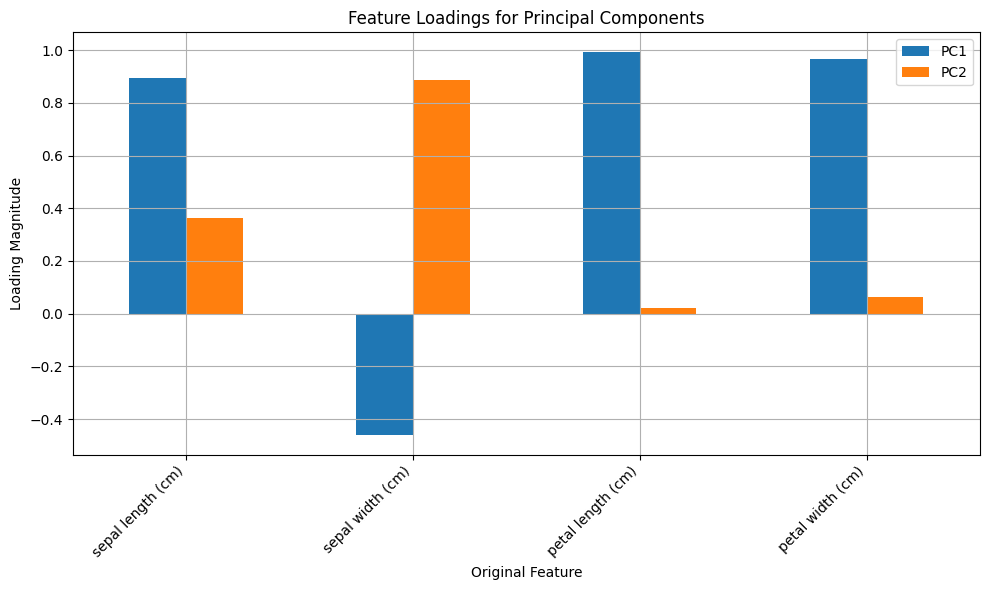

In [23]:
plt.figure(figsize=(10, 6))
loading_df.plot(kind='bar', ax=plt.gca())
plt.title('Feature Loadings for Principal Components')
plt.xlabel('Original Feature')
plt.ylabel('Loading Magnitude')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

## Kernel PCA

So far, PCA has been **linear**, meaning it can only capture directions of maximum variance in a straight-line sense.

However, real-world data is often **nonlinear**. For instance, imagine clusters shaped like spirals or concentric circles — linear PCA would fail to separate them properly.

Kernel PCA projects data into a higher-dimensional space using **kernel functions**, and then applies linear PCA in that new space.

### Nonlinear Dataset: Two Moons

Let’s generate a toy dataset with a **nonlinear structure** to show where PCA fails and kernel PCA succeeds.

### Why Kernel PCA?

Kernel PCA helps uncover nonlinear structure in data by applying the **kernel trick**:

Instead of transforming $ x \to \phi(x) $ explicitly, we compute inner products using a **kernel function**:

$$
K(x_i, x_j) = \langle \phi(x_i), \phi(x_j) \rangle
$$

Common kernels:
- RBF (Gaussian): captures radial patterns
- Polynomial: captures curved relationships
- Sigmoid: mimics neural activation functions

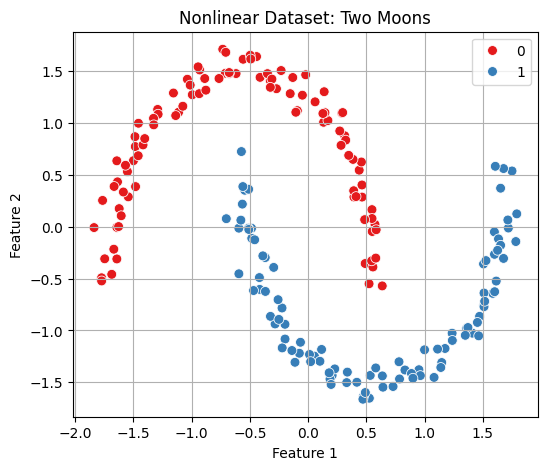

In [24]:
from sklearn.datasets import make_moons

# Create synthetic nonlinear dataset
X_moons, y_moons = make_moons(n_samples=200, noise=0.05, random_state=42)

# Standardize features
X_moons_scaled = StandardScaler().fit_transform(X_moons)

# Plot original data
plt.figure(figsize=(6, 5))
sns.scatterplot(x=X_moons_scaled[:, 0], y=X_moons_scaled[:, 1], hue=y_moons, palette='Set1', legend='full', s=50)
plt.title('Nonlinear Dataset: Two Moons')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

### Linear PCA Fails

Let’s try standard PCA and see how it struggles to untangle the two moon shapes when projected into 1 dimension.

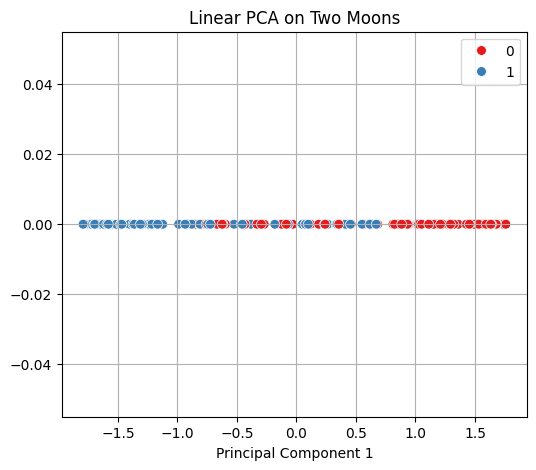

In [29]:
# Apply linear PCA
pca_linear = PCA(n_components=1)
X_linear_pca = pca_linear.fit_transform(X_moons_scaled)

# Flip the sign of the projected data to swap the horizontal position of the classes
X_linear_pca = X_linear_pca * -1

# Plot result
plt.figure(figsize=(6, 5))
sns.scatterplot(x=X_linear_pca[:, 0], y=[0] * len(X_linear_pca), hue=y_moons, palette='Set1', legend='full', s=50)
plt.title('Linear PCA on Two Moons')
plt.xlabel('Principal Component 1')
plt.ylabel('')
plt.grid(True)
plt.show()

### Apply Kernel PCA

We will apply Kernel PCA using the **RBF kernel** which maps data into a space where curved boundaries are more easily separated.

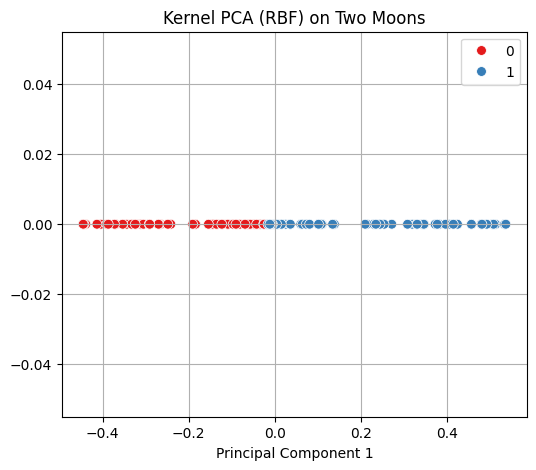

In [31]:
from sklearn.decomposition import KernelPCA

# Try Kernel PCA with RBF (Gaussian) kernel
kpca = KernelPCA(n_components=1, kernel='rbf', gamma=15)
X_kpca = kpca.fit_transform(X_moons_scaled)

# Plot result
plt.figure(figsize=(6, 5))
sns.scatterplot(x=X_kpca[:, 0], y=[0] * len(X_kpca), hue=y_moons, palette='Set1', legend='full', s=50)
plt.title('Kernel PCA (RBF) on Two Moons')
plt.xlabel('Principal Component 1')
plt.ylabel('')
plt.grid(True)
plt.show()

### Experiment: Different Kernels

You can try changing the kernel function and parameters:
- `'poly'`: Polynomial kernel, adjust `degree`
- `'sigmoid'`: Sigmoid kernel, mimics neural networks
- `'rbf'`: RBF kernel, adjust `gamma` for spread

Example:
```python
kpca = KernelPCA(n_components=1, kernel='poly', degree=3)
kpca = KernelPCA(n_components=1, kernel='sigmoid', gamma=0.01, coef0=1)
```

# LDA

Here we will explore **Linear Discriminant Analysis (LDA)** — a powerful technique for **supervised dimensionality reduction**.

Unlike PCA, which seeks to preserve overall variance without considering class labels, LDA **explicitly uses labels** to maximize **class separability**.

## What is LDA?

**Linear Discriminant Analysis (LDA)** is both a **dimensionality reduction** and a **classification** technique.

The idea:
- Reduce the feature space dimensionality (like PCA),
- But in a way that **maximizes the separation between known classes**.

LDA finds new axes (linear combinations of features) that:
- Maximize **between-class variance**,
- Minimize **within-class variance**.

This ensures that different classes are as **far apart** as possible in the new space, making classification easier.

## Mathematical Background of LDA

To understand how LDA works, we’ll derive its formulation step-by-step.
LDA tries to find a new axis (or axes) that best **discriminate between classes**.

### Notation and Setup

Let:
- $ X \in \mathbb{R}^{n \times d} $: Dataset with $ n $ samples and $ d $ features.
- $ y \in \{1, \dots, C\} $: Class labels (total of $ C $ classes).
- $ \mu $: Global mean of all samples.
- $ \mu_c $: Mean vector of class $ c $.
- $ n_c $: Number of samples in class $ c $.

LDA tries to find a linear projection:
$$
\mathbf{w} \in \mathbb{R}^d
$$
such that the **projected data** $ X \mathbf{w} $ has:
- **Small within-class scatter**
- **Large between-class scatter**

### Scatter Matrices

#### Within-class scatter matrix $ S_W $:
Measures how much samples deviate from their **own class mean**:
$$
S_W = \sum_{c=1}^{C} \sum_{x_i \in X_c} (x_i - \mu_c)(x_i - \mu_c)^T
$$

#### Between-class scatter matrix $ S_B $:
Measures how much **class means deviate from the global mean**:
$$
S_B = \sum_{c=1}^{C} n_c (\mu_c - \mu)(\mu_c - \mu)^T
$$

### LDA Objective Function

LDA seeks a projection $ \mathbf{w} $ that **maximizes the ratio**:

$$
J(\mathbf{w}) = \frac{\mathbf{w}^T S_B \mathbf{w}}{\mathbf{w}^T S_W \mathbf{w}}
$$

This is a **generalized Rayleigh quotient**, and its solution is obtained by solving the **generalized eigenvalue problem**:

$$
S_W^{-1} S_B \mathbf{w} = \lambda \mathbf{w}
$$

- The eigenvectors $ \mathbf{w}_1, \mathbf{w}_2, \dots $ correspond to the directions of maximum class separability.
- The number of useful components is limited to at most $ C - 1 $ (number of classes minus 1).

## LDA Implementation

We'll now manually implement LDA using the **Iris dataset**, which contains 3 classes.
Since LDA can return at most $ C - 1 $ components, we will get **2 LDA components**.

Steps:
1. Compute class-wise and overall means
2. Compute $ S_W $ and $ S_B $
3. Solve $ S_W^{-1} S_B \mathbf{w} = \lambda \mathbf{w} $
4. Project the data


### Compute Class Means and Global Mean

In [33]:
classes = np.unique(y)
mean_overall = np.mean(X_scaled, axis=0)
class_means = {}
class_counts = {}

for cls in classes:
    class_means[cls] = np.mean(X_scaled[y == cls], axis=0)
    class_counts[cls] = np.sum(y == cls)

print("Overall Mean:\n", mean_overall)
print("\nClass Means:")
for cls, mean in class_means.items():
    print(f"Class {cls}: {mean}")

Overall Mean:
 [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]

Class Means:
Class 0: [-1.01457897  0.85326268 -1.30498732 -1.25489349]
Class 1: [ 0.11228223 -0.66143204  0.28532388  0.1667341 ]
Class 2: [ 0.90229674 -0.19183064  1.01966344  1.08815939]



### Compute Scatter Matrices $ S_W $ and $ S_B $

In [34]:
d = X_scaled.shape[1]
S_W = np.zeros((d, d))
S_B = np.zeros((d, d))

for cls in classes:
    # Within-class scatter matrix
    X_c = X_scaled[y == cls]
    mean_c = class_means[cls]
    S_W += (X_c - mean_c).T.dot(X_c - mean_c)

    # Between-class scatter matrix
    mean_diff = (mean_c - mean_overall).reshape(d, 1)
    S_B += class_counts[cls] * mean_diff.dot(mean_diff.T)

print("Within-class scatter matrix shape:", S_W.shape)
print("Between-class scatter matrix shape:", S_B.shape)

Within-class scatter matrix shape: (4, 4)
Between-class scatter matrix shape: (4, 4)



### Solve Generalized Eigenvalue Problem

In [35]:
# Solve S_W^{-1} S_B w = lambda w
eigenvals_lda, eigenvecs_lda = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

# Sort by descending eigenvalue magnitude
sorted_indices_lda = np.argsort(eigenvals_lda)[::-1]
eigenvals_lda = eigenvals_lda[sorted_indices_lda]
eigenvecs_lda = eigenvecs_lda[:, sorted_indices_lda]

# Select top 2 eigenvectors
W_lda = eigenvecs_lda[:, :2]

print("Shape of W_lda:", W_lda.shape)

Shape of W_lda: (4, 2)



### Project Data onto LDA Components

In [36]:
X_lda = X_scaled.dot(W_lda)
print("Shape of projected data (LDA):", X_lda.shape)

Shape of projected data (LDA): (150, 2)


## Visualization of LDA Projection

Now that we have projected the data onto the top LDA components, we can:
- Visualize the transformed data in 2D.
- Compare LDA and PCA in terms of **class separability**.


### 2D Scatter Plot of LDA Projection

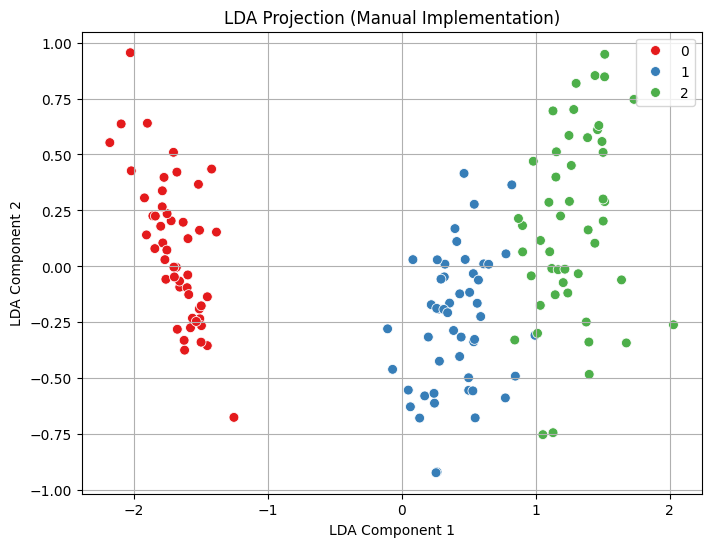

In [37]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_lda[:, 0], y=X_lda[:, 1], hue=y, palette='Set1', legend='full', s=50)
plt.title('LDA Projection (Manual Implementation)')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.grid(True)
plt.show()

Notice how LDA tries to **maximize the separation** between classes.

Unlike PCA, which focuses on overall variance, LDA optimizes for **discriminative directions**.


### Side-by-side Comparison: PCA vs. LDA

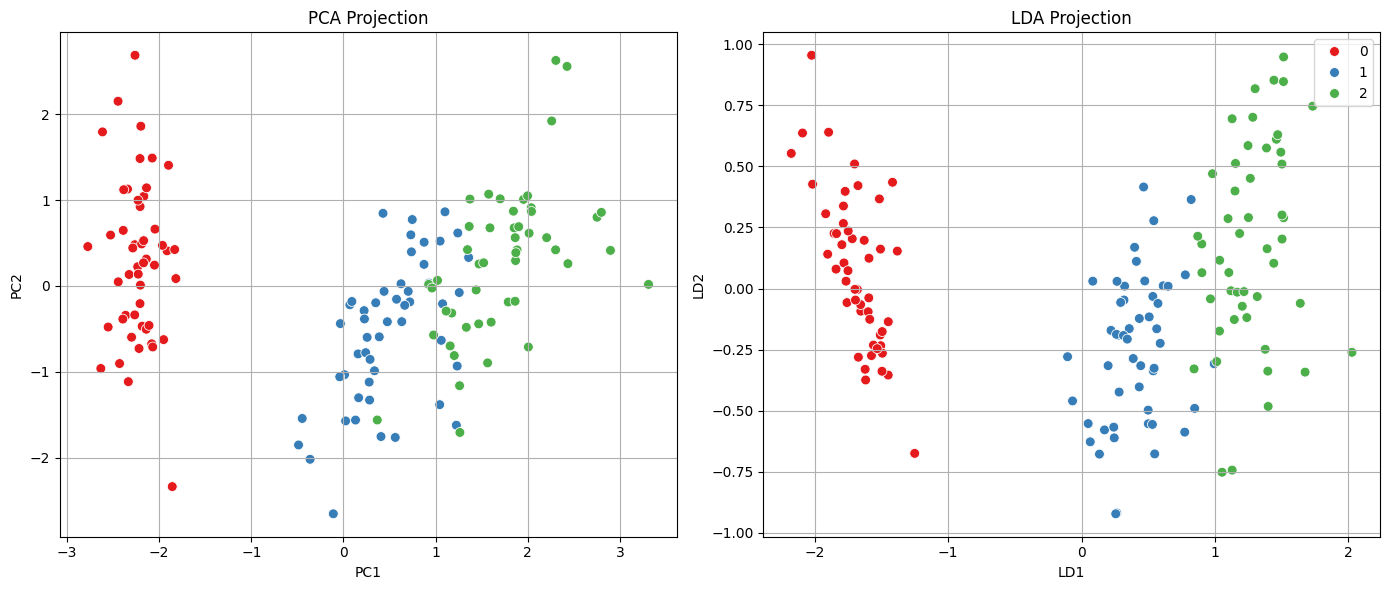

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# PCA Plot
sns.scatterplot(x=X_pca_sklearn[:, 0], y=X_pca_sklearn[:, 1], hue=y, palette='Set1', legend=False, s=50, ax=axes[0])
axes[0].set_title('PCA Projection')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].grid(True)

# LDA Plot
sns.scatterplot(x=X_lda[:, 0], y=X_lda[:, 1], hue=y, palette='Set1', legend='full', s=50, ax=axes[1])
axes[1].set_title('LDA Projection')
axes[1].set_xlabel('LD1')
axes[1].set_ylabel('LD2')
axes[1].grid(True)

plt.tight_layout()
plt.show()

## LDA Using Scikit-learn

We will now perform LDA using `scikit-learn`’s `LinearDiscriminantAnalysis` class.

This allows us to:
- Validate our manual LDA implementation
- Quickly perform LDA in practice
- Access useful attributes like explained variance


### Apply `LinearDiscriminantAnalysis`

In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Fit LDA model
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda_sklearn = lda.fit_transform(X_scaled, y)

print("Shape of LDA output (scikit-learn):", X_lda_sklearn.shape)

Shape of LDA output (scikit-learn): (150, 2)



### Visualize Scikit-learn LDA Projection

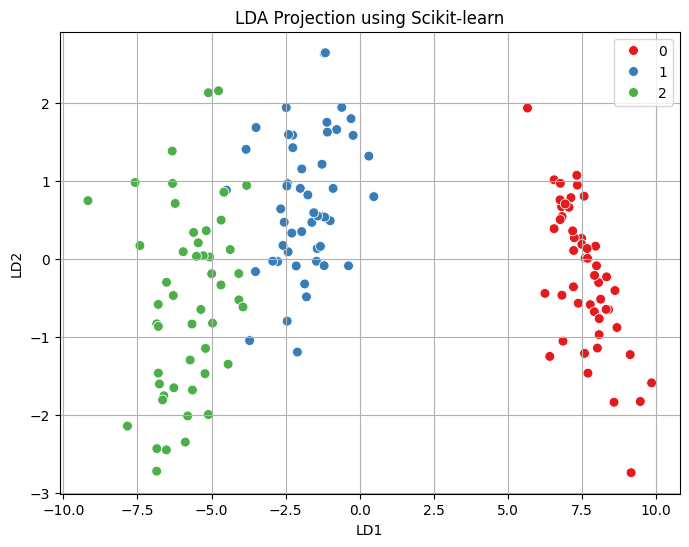

In [40]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_lda_sklearn[:, 0], y=X_lda_sklearn[:, 1], hue=y, palette='Set1', legend='full', s=50)
plt.title('LDA Projection using Scikit-learn')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.grid(True)
plt.show()


### Inspect LDA Attributes

In [41]:
print("Explained variance ratio:", lda.explained_variance_ratio_)
print("LDA scalings (coefficients):\n", lda.scalings_)

Explained variance ratio: [0.9912126 0.0087874]
LDA scalings (coefficients):
 [[ 0.68448644 -0.01989153]
 [ 0.66659193 -0.94029176]
 [-3.87282074  1.63962597]
 [-2.13508598 -2.15691008]]
